# **Gold Price Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

### **Data Collection and Processing**

In [3]:
# Load the dataset
df = pd.read_csv('gld_price_data.csv')

def data_overview(df):
    """ 
    Function to provide an overview of the dataset.
    It prints the first few rows, a description of the data, data types, missing values,
    shape of the data, columns, and index.
    """
    print("Data Overview:")
    print(df.head())
    
    """_summary_
    """
    print("\nData Description:")
    display(df.describe())
    
    """
    Data Information
    """
    print("\nData Types:")
    display(df.info())
    
    """
    Missing Values
    """
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    """_summary_
    """
    print("\nData Shape:")
    print(df.shape)
    
    """
    Data Columns
    """
    print("\nData Columns:")
    print(df.columns.tolist())
    
data_overview(df)

Data Overview:
       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099

Data Description:


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798



Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


None


Missing Values:
Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Data Shape:
(2290, 6)

Data Columns:
['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']


In [10]:
# Converting the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Check the data types after conversion 
print("\nData Types After Conversion:")
print(df.dtypes)


Data Types After Conversion:
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


### **Correlation**

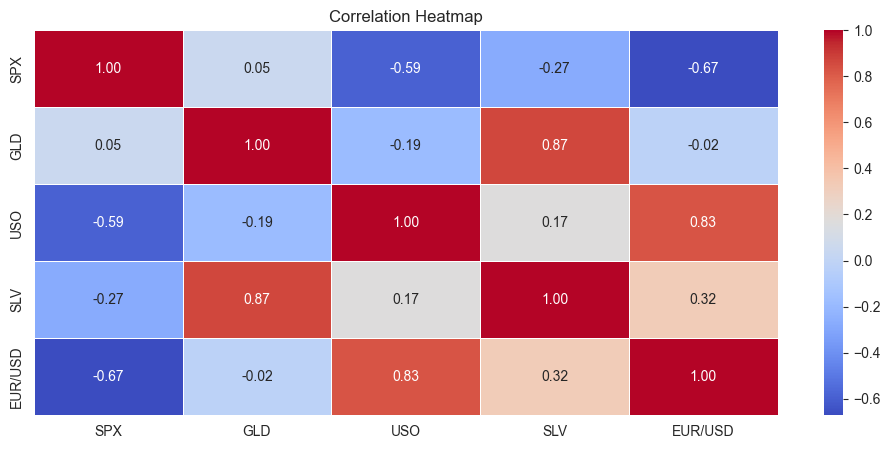

In [11]:
# checking for the correlation
corr = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

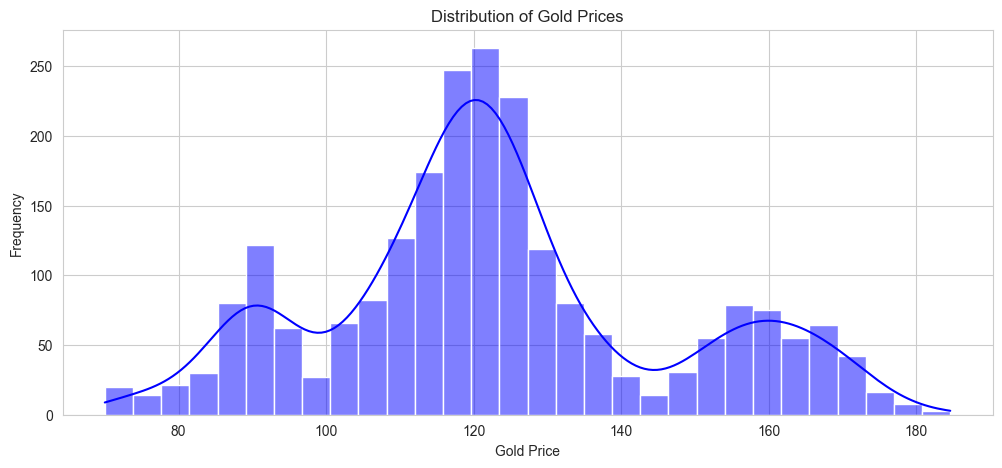

In [12]:
# Checking for the distribution of the data
plt.figure(figsize=(12, 5))
sns.histplot(df['GLD'], bins=30, kde=True, color='blue')
plt.title('Distribution of Gold Prices')
plt.xlabel('Gold Price')
plt.ylabel('Frequency')
plt.show()

In [13]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD
Date,,,,,
2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


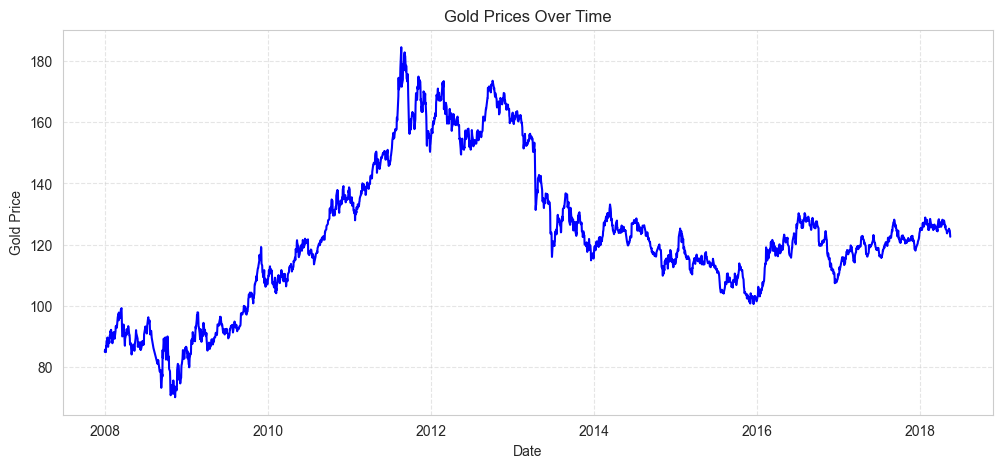

In [20]:
# Checking for the seasonality and trend in the data
plt.figure(figsize=(12, 5))
plt.plot(df['GLD'], color='blue')
plt.title('Gold Prices Over Time')
# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.show()

### **Splitting the Feature and Target**

In [22]:
# Splitting into feature and target variable
X = df.drop('GLD', axis=1)
y = df['GLD']

In [23]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(1832, 4)

(458, 4)

(1832,)

(458,)

### **Model Build -> LazyPredictor**

In [26]:
# Model Build --> LazyPredictor
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the LazyRegressor
lazy_reg = LazyRegressor()

# Fit the model
lazy_reg_model = lazy_reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Display the results
lazy_reg_model[0].head(10)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1832, number of used features: 4
[LightGBM] [Info] Start training from score 122.901138


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,1.00,1.65,2.12
KNeighborsRegressor,0.99,0.99,2.04,0.08
HistGradientBoostingRegressor,0.99,0.99,2.32,1.43
LGBMRegressor,0.99,0.99,2.33,0.41
RandomForestRegressor,0.99,0.99,2.34,2.79
XGBRegressor,0.99,0.99,2.50,1.01
BaggingRegressor,0.99,0.99,2.60,0.53
DecisionTreeRegressor,0.98,0.98,2.90,0.38
ExtraTreeRegressor,0.98,0.98,3.06,0.07


In [28]:
# Selecting the best model based on R-Squared score
best_model = lazy_reg_model[0].sort_values(by='R-Squared', ascending=False).head(1)
best_model_name = best_model.index[0]
best_model_score = best_model['R-Squared'].values[0]
print(f"Best Model: {best_model_name}, R-Squared Score: {best_model_score:.4f}")

Best Model: ExtraTreesRegressor, R-Squared Score: 0.9950


Mean Absolute Error: 1.2385
Mean Squared Error: 5.4751
R-Squared Score: 0.9900


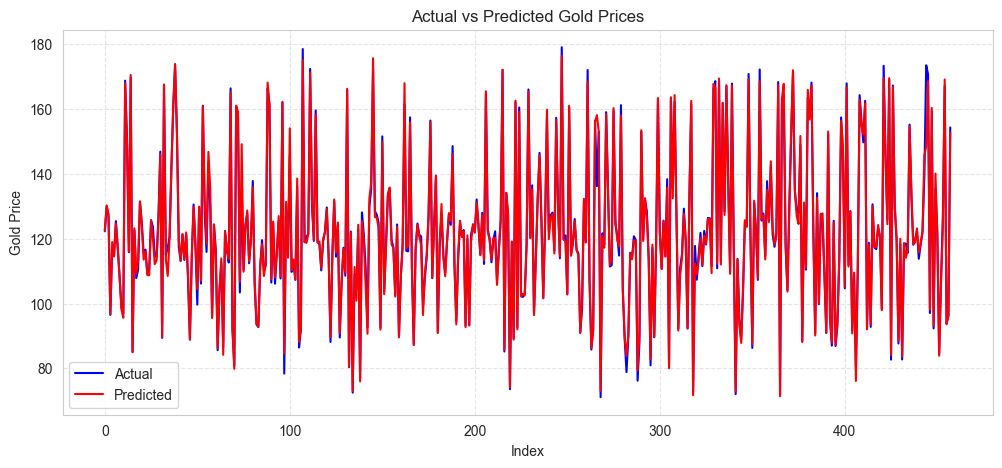

In [29]:
# Training the model with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Comparing the result
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R-Squared Score: {r2_score(y_test, y_pred):.4f}")

# Plotting the predictions vs actual values
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [35]:
# Showing the actual value vs the predicted value in a DataFrame
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
Date,,
2017-11-24,122.32,122.47
2013-10-24,129.90,130.29
2013-10-21,126.98,127.73
2008-03-06,96.50,96.70
2017-03-02,117.58,118.97


In [36]:
# Saving the model using joblib
import joblib
joblib.dump(rf_model, 'gold_price_model.pkl')

['gold_price_model.pkl']